# 주성분 분석 (PCA 분석)

## 1. 주성분 분석 개요
### 1) 차원 축소 (Dimensionality Reduction)
- 데이터의 전반적인 `특성을 보존`하면서 데이터의 `변수 수를 줄이는 방법`
    > 크기가 10행 7열인 dataframe의 차원은 (10x7)
    >
    > 변수 3개를 제거하면 10행 4열로 바뀜, 이때 차원은 (10x4)

    |방법|종류|
    |--:|-|
    |특성 선택|가장 즁요한 특성들만 선택하여 기존의 데이터 표현|
    |특성 추출|기존 특성들을 사용하여 새로운 특성들을 만들어내는 방법|
### 2) 주성분 분석(PCA)
- 데이터의 가장 큰 분산을 가진 방향으로 차원을 축소하여 데이터를 표현하는 방법
- 이를 통해 데이터를 가장 잘 설명하는 주요 특성들을 찾을 수 있다
- 데이터의 복잡성을 줄여주어 다양한 분야에서 활용되며, 머신러닝, 패턴인식, 시각화, 데이터 압축 등 다양한 분야에서 중요한 기술로 사용

## 2. 작업 준비
### 패키지 참조
- `scikit-learn`와 `pca` 패키지 설치 필요


In [2]:
# 주성분 분석용 패키지
from sklearn.decomposition import PCA
# 주성분 분석 결과를 DataFrame으로 확인할 수 있는 기능을 제공하는 패키지
from pca import pca
# 표준화 처리 패키지
from sklearn.preprocessing import StandardScaler

from pandas import read_excel, DataFrame, merge, melt

from matplotlib import pyplot as plt
import seaborn as sb

import sys, os
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from helper import my_ols

### 데이터 가져오기

|필드|설명|
|--:|-|
|CRIM|범죄율|
|ZN|25,000 평방피트를 초과 거주지역 비율|
|INDUS|비소매상업지역 면적 비율|
|CHAS|찰스강의 경계에 위치한 경우는 1, 아니면 0|
|NOX|일산화질소 농도|
|RM|주택당 방 수|
|AGE|1940년 이전에 건축된 주택의 비율|
|DIS|직업센터의 거리|
|RAD|방사형 고속도로까지의 거리|
|TAX|재산세율|
|PTRATIO|학생/교사 비율|
|B|인구 중 흑인 비율|
|LSTAT|인구 중 하위 계층 비율|
|MEDV|집값|
|CAT.MEDV|$3000 이상 여부|

In [3]:
df = read_excel('https://data.hossam.kr/E04/boston.xlsx')
# df.drop('CAT. MEDV', axis=1, inplace=True)
df.rename(columns ={'CAT. MEDV':'CAT_MEDV'}, inplace=True)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT_MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0


## 2. 데이터 전처리
### 독립변수 컬럼(x_train), 종속변수 컬럼(y_train) 추출

In [4]:
x_train = df.drop('MEDV', axis=1)
print(x_train)
y_train = df.filter(['MEDV'])
print(y_train)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO       B  LSTAT  CAT_MEDV  
0       15.3  396.90   4.98         0  
1       17.8  396.90   9.14         0  
2  

### 추출된 독립변수, 종속변수를 `표준화`, 표준화 결과를 데이터프레임으로 재구성
- `StandardScaler()`
- `scaler.fit_transform(독립변수데이터)`
- 주성분 분석에서는 데이터 표준화가 필수 과정이다

In [5]:
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
y_train_std = scaler.fit_transform(y_train)
print(x_train_std)
print(y_train_std)

# 데이터프레임으로 재구성
x_train_std_df = DataFrame(x_train_std, columns = x_train.columns)
y_train_std_df = DataFrame(y_train_std, columns=y_train.columns)
print(x_train_std_df)
print(y_train_std_df)

[[-0.41978194  0.28482986 -1.2879095  ...  0.44105193 -1.0755623
  -0.44615259]
 [-0.41733926 -0.48772236 -0.59338101 ...  0.44105193 -0.49243937
  -0.44615259]
 [-0.41734159 -0.48772236 -0.59338101 ...  0.39642699 -1.2087274
   2.24138563]
 ...
 [-0.41344658 -0.48772236  0.11573841 ...  0.44105193 -0.98304761
  -0.44615259]
 [-0.40776407 -0.48772236  0.11573841 ...  0.4032249  -0.86530163
  -0.44615259]
 [-0.41500016 -0.48772236  0.11573841 ...  0.44105193 -0.66905833
  -0.44615259]]
[[ 0.15968566]
 [-0.10152429]
 [ 1.32424667]
 [ 1.18275795]
 [ 1.48750288]
 [ 0.6712218 ]
 [ 0.03996443]
 [ 0.49708184]
 [-0.65659542]
 [-0.39538548]
 [-0.81985164]
 [-0.39538548]
 [-0.09064054]
 [-0.23212926]
 [-0.47157171]
 [-0.286548  ]
 [ 0.06173193]
 [-0.54775795]
 [-0.25389676]
 [-0.47157171]
 [-0.97222411]
 [-0.31919924]
 [-0.79808414]
 [-0.87427038]
 [-0.75454915]
 [-0.93957286]
 [-0.64571167]
 [-0.84161913]
 [-0.44980422]
 [-0.16682677]
 [-1.07017784]
 [-0.87427038]
 [-1.0157591 ]
 [-1.02664285]


## 3. Sklearn을 사용한 PCA 분석
### 주성분 분석 객체 생성
- `PCA(n_components = n)`
    - n_components: 주성분 개수

In [6]:
# model = PCA(n_components = len(x_train.columns))
model = PCA(n_components = 5)
fit = model.fit_transform(x_train_std_df)
fit

array([[-1.99710352,  0.15409131, -0.61247924, -0.43939096,  0.72459898],
       [-1.34280853, -0.58749635, -0.90929983, -0.51303048, -0.03865004],
       [-2.46454551,  1.46348032, -0.18803482, -1.11607351, -0.71052836],
       ...,
       [-0.23439017,  0.10724108, -1.21035768, -1.0755284 , -1.26325856],
       [-0.18743287, -0.0827932 , -1.19596245, -0.98210286, -1.1357582 ],
       [-0.02451747, -0.7478343 , -1.28810535, -0.69532151, -0.79507829]])

### 결과 확인
- `sklearn`의 PCA 분석은 기존의 변수들을 토대로 `n_component` 수 만큼의 새로운 변수를 생성한다.
- 대부분 `머신러닝의 학습 데이터를 생성`하는 용도

In [7]:
pca_df = DataFrame(fit, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
pca_df

,PC1,PC2,PC3,PC4,PC5
0,-1.997104,0.154091,-0.612479,-0.439391,0.724599
1,-1.342809,-0.587496,-0.909300,-0.513030,-0.038650
2,-2.464546,1.463480,-0.188035,-1.116074,-0.710528
3,-2.979475,0.905934,0.199354,-0.880780,-1.006217
4,-2.831428,1.007558,0.128556,-0.950883,-0.945335
...,...,...,...,...,...
501,-0.220435,-0.463095,-1.056461,-0.767703,-0.945114
502,-0.010658,-0.714886,-1.266208,-0.707076,-0.787885
503,-0.234390,0.107241,-1.210358,-1.075528,-1.263259
504,-0.187433,-0.082793,-1.195962,-0.982103,-1.135758


### 각 PC값들의 설명력 확인

In [8]:
ev = model.explained_variance_
ev_df = DataFrame(ev, 
                  index=['PC1','PC2','PC3','PC4','PC5'], 
                  columns=['EV'])
print(ev)
print(ev_df)

[6.32345898 1.70085503 1.40598701 0.88826626 0.83970454]
           EV
PC1  6.323459
PC2  1.700855
PC3  1.405987
PC4  0.888266
PC5  0.839705


### 설명력 시각화

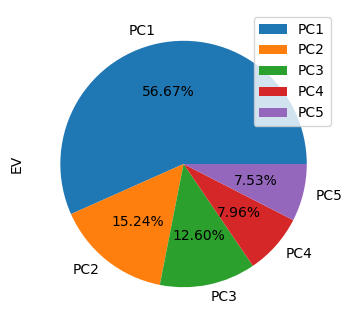

In [9]:
plt.rcParams["figure.figsize"] = (4, 4)

ev_df.plot.pie(y='EV', autopct='%.2f%%')
plt.show()
plt.close()

### 설명력에 대한 비율 확인 및 설명력 비율 시각화
- 앞 그래프와 동일함을 알 수 있다.

          EVR
PC1  0.450783
PC2  0.121250
PC3  0.100229
PC4  0.063322
PC5  0.059860


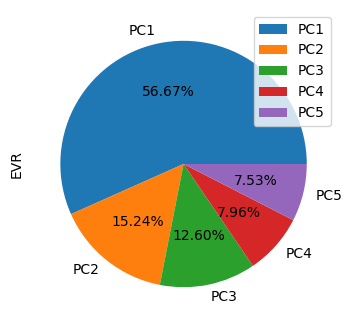

In [10]:
evr = model.explained_variance_ratio_
evr_df = DataFrame(evr, index=['PC1','PC2','PC3','PC4','PC5'], columns=['EVR'])
print(evr_df)

plt.rcParams["figure.figsize"] = (4, 4)

evr_df.plot.pie(y='EVR', autopct='%.2f%%')
plt.show()
plt.close()

## 4. pca 패키지를 사용한 분석 (추천)
- 주성분 분석의 대상 컬럼 수를 독립변수의 전체 컬럼의 길이로 설정
    - `pca(n_components=len(데이터프레임.columns))`
- 표준화 결과를 활용하여 주성분 분석 수행
    - `model.fit_transform(데이터프레임)`
- 주성분 topfeat 확인
    - fit['topfeat']


In [11]:
model = pca()
fit = model.fit_transform(x_train_std_df)
topfeat = fit['topfeat']
topfeat

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [14] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [10] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [14] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[10]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


,PC,feature,loading,type
0,PC1,INDUS,0.341333,best
1,PC2,CAT_MEDV,0.553636,best
2,PC3,ZN,0.408853,best
3,PC4,CHAS,0.876362,best
4,PC5,PTRATIO,-0.659916,best
5,PC6,B,-0.802906,best
6,PC7,CRIM,0.715693,best
7,PC8,LSTAT,-0.475735,best
8,PC9,CAT_MEDV,0.601798,best
9,PC10,INDUS,0.643144,best


## 5. 주성분 분석 결과를 토대로 회귀분석 수행
#### 설명력이 높은 필드 추출

In [12]:
best = topfeat.query("type == 'best'")
feature = list(set(list(best['feature'])))
feature

['ZN', 'CHAS', 'LSTAT', 'PTRATIO', 'INDUS', 'CRIM', 'CAT_MEDV', 'B']

#### 회귀분석 수행
- 표준화가 완료된 독립변수 데이터프레임과 종속변수 데이터프레임을 하나로 병합하여 사용한다.

In [13]:
target_df = merge(x_train_std_df, y_train_std_df, left_index=True, right_index=True)
ols = my_ols(target_df, "MEDV", feature)
print(ols.summary)
print(ols.table)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     291.8
Date:                Mon, 31 Jul 2023   Prob (F-statistic):          2.39e-182
Time:                        09:41:31   Log-Likelihood:                -277.75
No. Observations:                 506   AIC:                             573.5
Df Residuals:                     497   BIC:                             611.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.166e-16      0.019  -2.75e-14      1.0

#### 결과 비교하기
- 산점도 그래프에 표시할 x축 데이터 용도로 독립변수 중에서 임의의 필드를 포함시킨다.
- 예측: `ols.fit.predict(데이터프레임.filter(feature))`

In [14]:
result_df = DataFrame({
    'PTRATIO':target_df['PTRATIO'],
    "실제집값":target_df['MEDV'],
    "예측집값":ols.fit.predict(target_df.filter(feature))
})
result_df

,PTRATIO,실제집값,예측집값
0,-1.459000,0.159686,0.338834
1,-0.303094,-0.101524,0.047597
2,-0.303094,1.324247,1.830296
3,0.113032,1.182758,1.835695
4,0.113032,1.487503,1.695942
...,...,...,...
501,1.176466,-0.014454,-0.113086
502,1.176466,-0.210362,-0.074729
503,1.176466,0.148802,0.128045
504,1.176466,-0.057989,0.075657


#### 실제 데이터와 예측 결과 산점도 그래프로 비교

       PTRATIO variable     value
0    -1.459000     실제집값  0.159686
1    -0.303094     실제집값 -0.101524
2    -0.303094     실제집값  1.324247
3     0.113032     실제집값  1.182758
4     0.113032     실제집값  1.487503
...        ...      ...       ...
1007  1.176466     예측집값 -0.113086
1008  1.176466     예측집값 -0.074729
1009  1.176466     예측집값  0.128045
1010  1.176466     예측집값  0.075657
1011  1.176466     예측집값 -0.003964

[1012 rows x 3 columns]


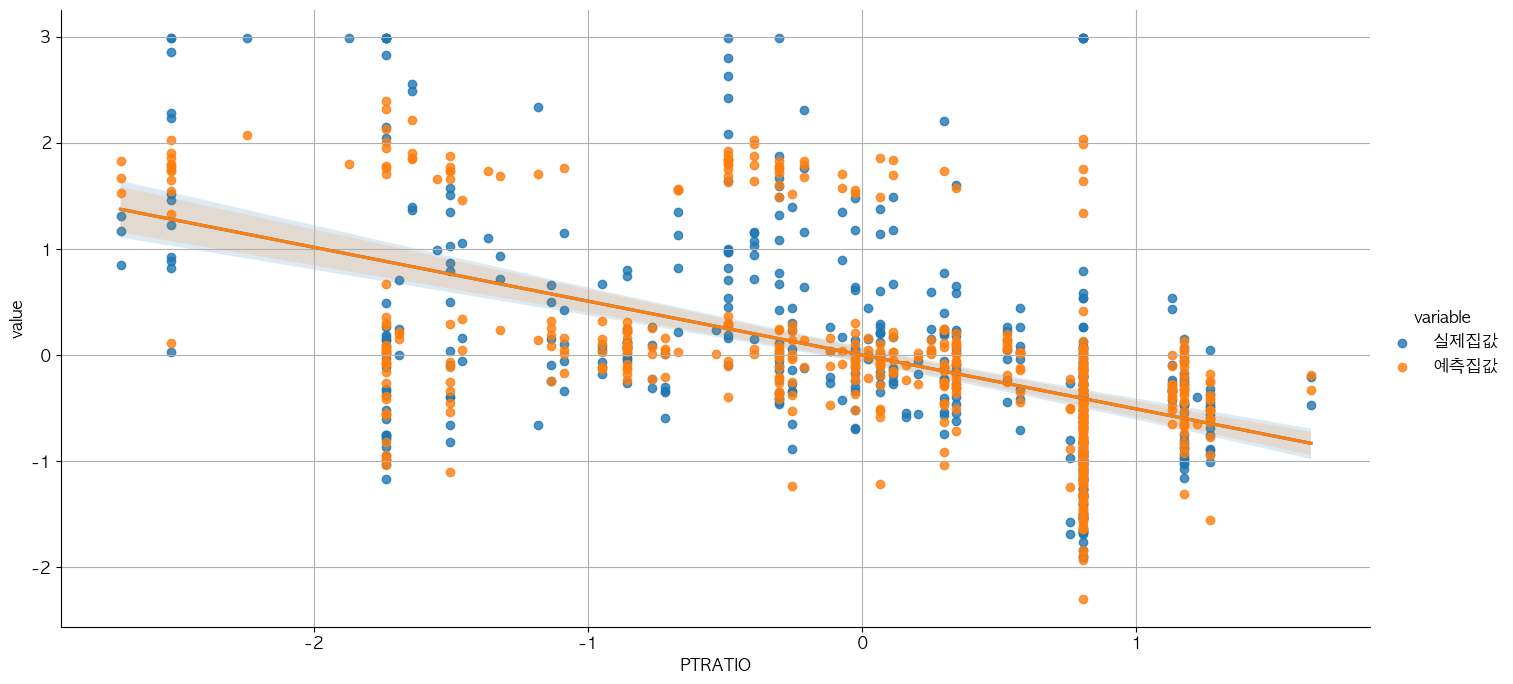

In [15]:
melted_df = melt(result_df, id_vars = ['PTRATIO'])
print(melted_df)

plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["axes.unicode_minus"] = False

sb.lmplot(data=melted_df, x="PTRATIO", y="value", hue="variable", height=7, aspect=2)
plt.grid()
plt.show()
plt.close()
